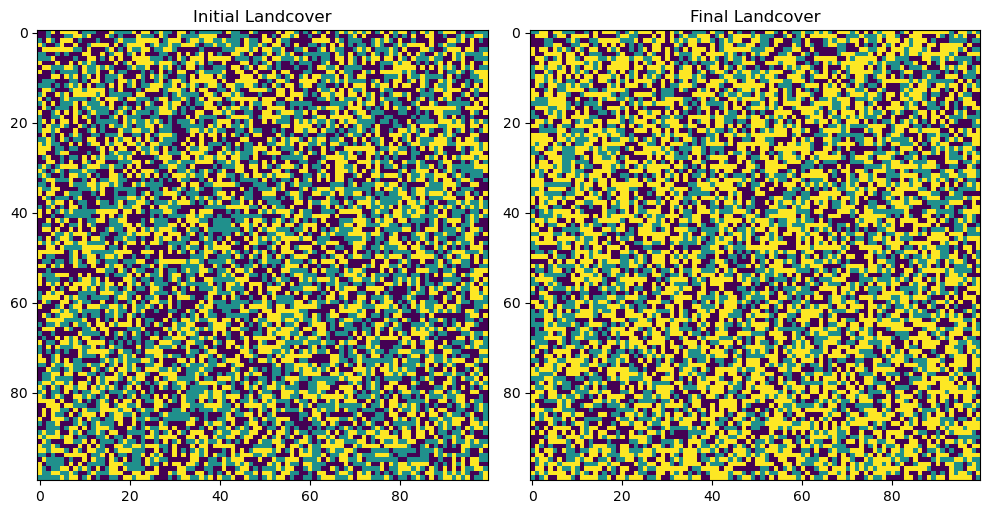

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Model parameters
NUM_TIMESTEPS = 40
LANDCOVER_CLASSES = ['Forest', 'Agriculture', 'Urban']

# Generate random transition probability matrices 
TRANSTION_PROBS = np.random.rand(len(LANDCOVER_CLASSES), len(LANDCOVER_CLASSES), NUM_TIMESTEPS)
for i in range(NUM_TIMESTEPS):
    TRANSTION_PROBS[:,:,i] = TRANSTION_PROBS[:,:,i] / TRANSTION_PROBS[:,:,i].sum(axis=1)[:,None]

# Generate random initial landcover map
INIT_MAP = np.random.randint(0, len(LANDCOVER_CLASSES), size=(100,100))

# Run Markov chain simulation
cur_map = INIT_MAP
for i in range(NUM_TIMESTEPS):
    next_map = np.zeros_like(cur_map)
    for j in range(len(LANDCOVER_CLASSES)):
        mask = (cur_map == j)
        probs = TRANSTION_PROBS[j,:,i]
        next_class = np.random.choice(len(LANDCOVER_CLASSES), p=probs, size=mask.sum())
        next_map[mask] = next_class
    cur_map = next_map

# Plot initial and final maps    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(INIT_MAP)
ax1.set_title('Initial Landcover')
ax2.imshow(cur_map)
ax2.set_title('Final Landcover')
plt.tight_layout()
plt.show()